<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/mod_9_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>1) List some reasons why we should prefer CNN over ANN for image classification?</b><br>
Answers:
Feature Detection: CNNs excel at automatically extracting relevant features from images, such as edges, textures, and shapes, through convolutional layers.
Parameter Sharing: CNNs utilize parameter sharing, making them more memory and computationally efficient compared to ANNs for processing large images.
Spatial Hierarchies: CNNs preserve the spatial structure of the input data, capturing spatial hierarchies of features crucial for tasks like object recognition.
Translation Invariance: CNNs inherently possess translation invariance, enabling them to recognize patterns irrespective of their location in the image.

<b>2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 2.1636, Accuracy: 22.53%
Epoch [2/10], Loss: 1.8871, Accuracy: 34.10%
Epoch [3/10], Loss: 1.7210, Accuracy: 39.23%
Epoch [4/10], Loss: 1.5969, Accuracy: 43.72%
Epoch [5/10], Loss: 1.4926, Accuracy: 47.06%
Epoch [6/10], Loss: 1.4129, Accuracy: 49.93%
Epoch [7/10], Loss: 1.3484, Accuracy: 52.29%
Epoch [8/10], Loss: 1.2905, Accuracy: 54.12%
Epoch [9/10], Loss: 1.2524, Accuracy: 55.78%
Epoch [10/10], Loss: 1.2068, Accuracy: 57.47%
Finished Training


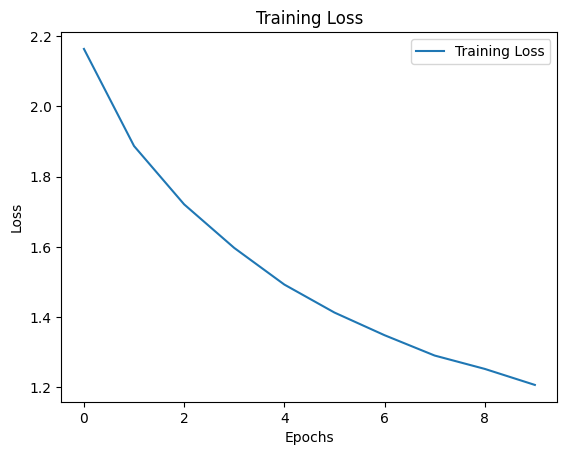

Accuracy of the network on the 10000 test images: 56.88 %


In [ ]:
# Importing necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 dataset preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))  # corrected 'F' to 'nn.functional'
        x = self.pool(nn.functional.relu(self.conv2(x)))  # corrected 'F' to 'nn.functional'
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))  # corrected 'F' to 'nn.functional'
        x = self.fc2(x)
        return x

# Define a function to train the model
def train(num_epochs, model, train_loader, criterion, optimizer):
    model.train()
    train_losses = []
    train_acc = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_acc.append(epoch_acc)
        print('Epoch [%d/%d], Loss: %.4f, Accuracy: %.2f%%' %
              (epoch + 1, num_epochs, epoch_loss, epoch_acc * 100))

    print('Finished Training')
    return train_losses, train_acc

# Define a function to test the model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

# Initialize the model, loss function, and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

# Plot training losses and accuracy
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Test the model on test data
test(model, testloader)


<b>3) What happens if you reduce the number of convolution layers to only 1?

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 2.2538, Accuracy: 16.71%
Epoch [2/10], Loss: 1.9859, Accuracy: 29.88%
Epoch [3/10], Loss: 1.8005, Accuracy: 36.20%
Epoch [4/10], Loss: 1.6837, Accuracy: 40.37%
Epoch [5/10], Loss: 1.5724, Accuracy: 43.88%
Epoch [6/10], Loss: 1.4826, Accuracy: 47.01%
Epoch [7/10], Loss: 1.4164, Accuracy: 49.23%
Epoch [8/10], Loss: 1.3579, Accuracy: 51.41%
Epoch [9/10], Loss: 1.3146, Accuracy: 53.03%
Epoch [10/10], Loss: 1.2752, Accuracy: 54.30%
Finished Training


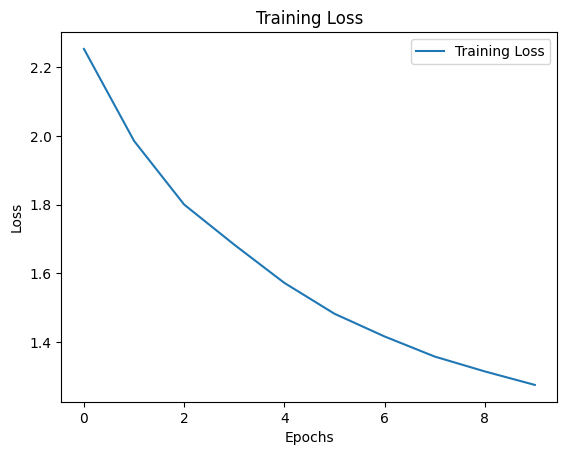

Accuracy of the network on the 10000 test images: 53.92 %


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 dataset preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Define the CNN architecture with only one convolutional layer
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # Reduced to one convolutional layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 16 * 16, 120)  # Adjusted input size for fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 16 * 16 * 16)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define a function to train the model
def train(num_epochs, model, train_loader, criterion, optimizer):
    model.train()
    train_losses = []
    train_acc = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_acc.append(epoch_acc)
        print('Epoch [%d/%d], Loss: %.4f, Accuracy: %.2f%%' %
              (epoch + 1, num_epochs, epoch_loss, epoch_acc * 100))

    print('Finished Training')
    return train_losses, train_acc

# Define a function to test the model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

# Initialize the model, loss function, and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

# Plot training losses and accuracy
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Test the model on test data
test(model, testloader)


<b>4) Why didn't we use the Softmax activation in the last layer of CNN?
</b><br>
Answer:
In the provided CNN architecture, the Cross Entropy Loss function is used as the criterion for optimization. This loss function internally applies the softmax operation to the logits (raw outputs) of the model and computes the loss based on the predicted probabilities. Therefore, adding a softmax layer after the last fully connected layer is redundant in this case. The model directly outputs raw logits, and the loss function takes care of the conversion to probabilities and computation of the loss during training.

<b>